# Computer Assignment 2

Due Date 21 กันยายน 2566 ก่อนเวลา 23.00 น.

ให้ส่งเป็น pdf file ผ่านระบบที่ mango.cmu.ac.th เท่านั้น

Note ห้าม ใช้ library หรือ โปรแกรมสำหรับรูปใดๆ ทั้งสิ้น จะต้องเขียนโปรแกรมด้วยตัวเองทั้งหมด ห้าม ลอกงานคนอื่นถ้าลอกกันมา ทั้งคนให้ลอกและคนลอกจะได้รับคะแนนเป็น 0 ทั้งคู่ และให้แนบ program มาในส่วนของภาคผนวกของรายงานด้วย

การบ้านนี้มี 2 ข้อ

## 2.1 จงทำการทดลองโดยใช้ K-nn และอย่าลืมทำการประเมินประสิทธิภาพของวิธีการนี้ 
เช่นใช้ 10% cross validation หรือ เปรียบเทียบกับ Bayes (Maximum Likelihood) และอื่นๆ ให้ใช้ dataset ใดก็ได้เช่น TWOCLASS, IRIS (Iris และ TWOCLASS มี format ที่เหมือนกันนั่นคือ f1 f2 f3 f4 class-label), CROSS, ELLIPSE (Cross และ Ellipse มี format ที่เหมือนกันนั่นคือ

                                               p#

                                               f1 f2

                                               0 1        %หมายถึง class 2 ถ้าเป็น 1 0 (class 1))

หรือ dataset อื่นๆ ถ้ามี

รายงานควรจะประกอบด้วย

            1. รายละเอียดของทฤษฎีหรือวิธีการต่างๆที่ใช้

            2. การออกแบบ algorithm เช่น pseudo-code, flowchart, ฯลฯ

            3. ผลการทดลอง

            4. การวิเคราะห์การทดลอง เช่น ได้ผลตามที่คาดไว้หรือไม่ มีสิ่งประหลาดเกิดขึ้นหรือไม่ บทสรุปที่ได้คืออะไร ฯลฯ

            5. Well documented, structured, modular program listing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
dfkdlfk

NameError: name 'dfkdlfk' is not defined

In [2]:
file_path = "TWOCLASS.dat"

try:
    with open(file_path, "r") as file:
        content = file.read()
        data = content.split()
        # print(data)
except FileNotFoundError:
    print("File not found!")

# drop the first 6 elements from list 'data'
data = data[6:]

In [3]:
data_processed = []

for i in range(0, len(data), 5):
    data_processed.append([float(data[i]), float(data[i+1]), float(data[i+2]), \
                           float(data[i+3]), int(data[i+4])])

# print length of data
print("Length of data: ", len(data_processed))

Length of data:  200


# Maximum Likelihood 
From previous homework, used for comparison

In [4]:
# Step 1: Estimate Parameters (Mean vectors and Covariance matrices)
def estimate_parameters(data):
    num_features = len(data[0]) - 1  # Exclude the last column (class label)
    num_classes = int(max(data, key=lambda x: x[-1])[-1])  # Assuming class labels are 1-indexed

    mean_vectors = {i: np.zeros(num_features) for i in range(1, num_classes + 1)}
    covariance_matrices = {i: np.zeros((num_features, num_features)) for i in range(1, num_classes + 1)}
    class_counts = {i: 0 for i in range(1, num_classes + 1)}

    # Calculate the sum of feature values for each class
    for row in data:
        class_label = int(row[-1])
        class_counts[class_label] += 1
        for i in range(num_features):
            mean_vectors[class_label][i] += row[i]

    # Calculate the mean vectors
    for class_label in mean_vectors:
        mean_vectors[class_label] /= class_counts[class_label]

    # Calculate the covariance matrices
    for row in data:
        class_label = int(row[-1])
        x_minus_mean = row[:-1] - mean_vectors[class_label]
        x_minus_mean = x_minus_mean.reshape((-1, 1))  # Convert to column vector
        covariance_matrices[class_label] += np.dot(x_minus_mean, x_minus_mean.T)

    for class_label in covariance_matrices:
        covariance_matrices[class_label] /= (class_counts[class_label] - 1)

    return mean_vectors, covariance_matrices

# Step 2: Minimum Risk Bayes Decision Theoretic Classifier
def multivariate_normal_pdf(x, mean, covariance_matrix):
    # Calculate the multivariate normal probability density function (PDF) for a given test sample 'x'
    # with the given mean and covariance matrix.
    k = len(x)
    coefficient = 1.0 / ((2 * np.pi) ** (k / 2) * np.linalg.det(covariance_matrix))

    # Calculate (x - mean)
    x_minus_mean = x - mean

    # Calculate the inverse of the covariance matrix
    inv_covariance = np.linalg.inv(covariance_matrix)

    # Calculate the Mahalanobis distance squared
    mahalanobis_dist_sq = np.dot(x_minus_mean, np.dot(inv_covariance, x_minus_mean))

    # Calculate the exponent
    exponent = -0.5 * mahalanobis_dist_sq

    return coefficient * np.exp(exponent)

def minimum_risk_classifier(test_sample, mean_vectors, covariance_matrices, prior_probabilities):
    num_classes = len(mean_vectors)
    risks = [0] * num_classes

    for class_label in range(1, num_classes + 1):
        mean_vector = np.array(mean_vectors[class_label])
        covariance_matrix = np.array(covariance_matrices[class_label])
        
        # Calculate the multivariate normal PDF for the current class
        pdf = multivariate_normal_pdf(test_sample, mean_vector, covariance_matrix)
        
        # Calculate the risk for the current class, which is the negative log-PDF plus the log-prior probability.
        risks[class_label - 1] = -np.log(pdf) + np.log(prior_probabilities[class_label])

    # Choose the class with the minimum risk as the predicted class label.
    predicted_label = np.argmin(risks) + 1
    return predicted_label




# k-NN classifier

In [5]:
class KNNClassifier:
    # k-Nearest Neighbors Classifier
    # first, initial the class with k value
    # then, call the class with test sample and train data
    def __init__(self, k=3):
        self.k = k

    def __call__(self, test_sample, train_data):
        k_nearest_neighbors = self.compute_k_nearest_neighbors(test_sample, train_data)
        class_labels = [sample[-1] for sample in k_nearest_neighbors]
        predicted_label = max(set(class_labels), key=class_labels.count)
        return predicted_label

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def compute_k_nearest_neighbors(self, test_sample, train_data):
        distances = []

        for train_sample_features in train_data:
            test_sample_ = test_sample[:-1]
            train_sample_features_ = train_sample_features[:-1]
            distance = self.euclidean_distance(test_sample_, train_sample_features_)
            distances.append((train_sample_features, distance))

        distances.sort(key=lambda x: x[1])
        k_nearest_neighbors = [sample[0] for sample in distances[:self.k]]
        return k_nearest_neighbors

# 10-fold cross validation


Fold 1
k-NN accuracy: 0.95
MLC accuracy: 0.95


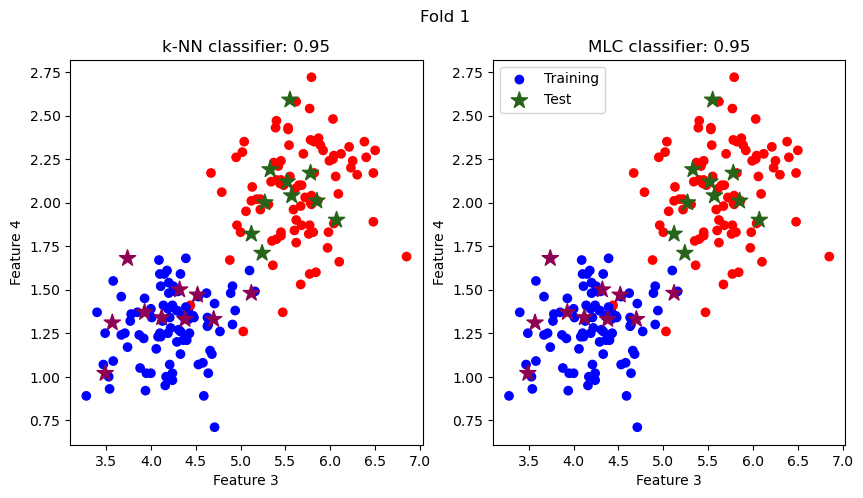


Fold 2
k-NN accuracy: 1.00
MLC accuracy: 1.00


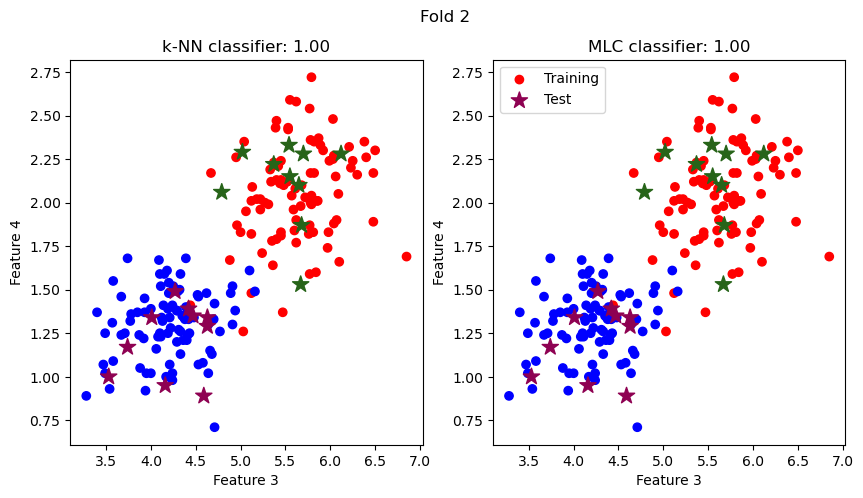


Fold 3
k-NN accuracy: 0.95
MLC accuracy: 0.95


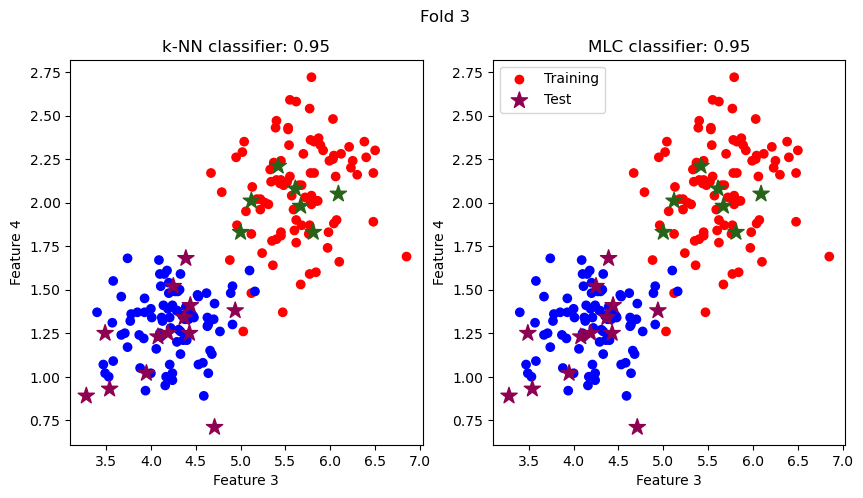


Fold 4
k-NN accuracy: 0.90
MLC accuracy: 0.90


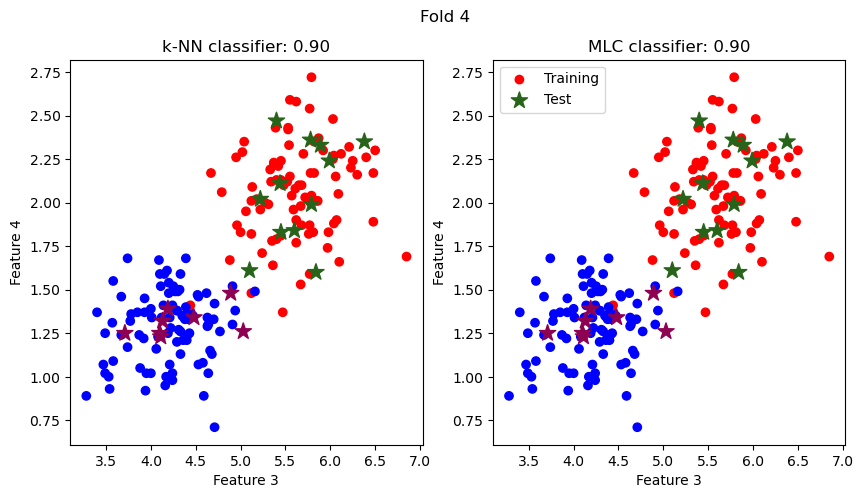


Fold 5
k-NN accuracy: 1.00
MLC accuracy: 1.00


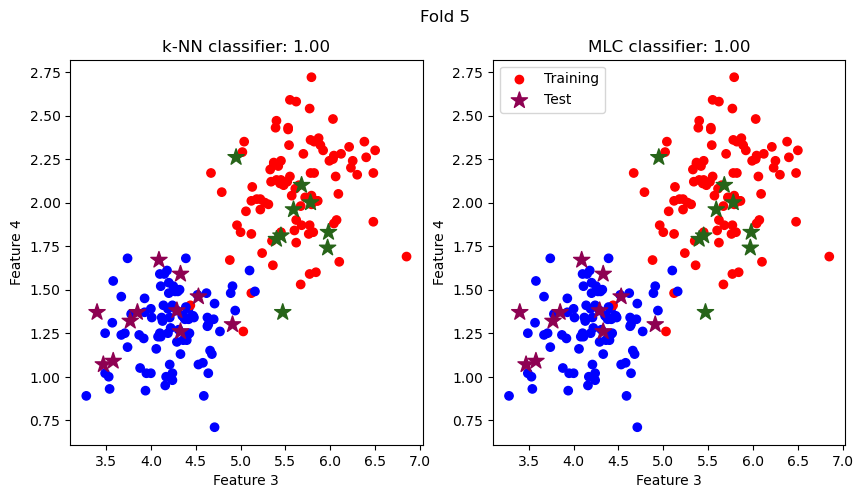


Fold 6
k-NN accuracy: 1.00
MLC accuracy: 1.00


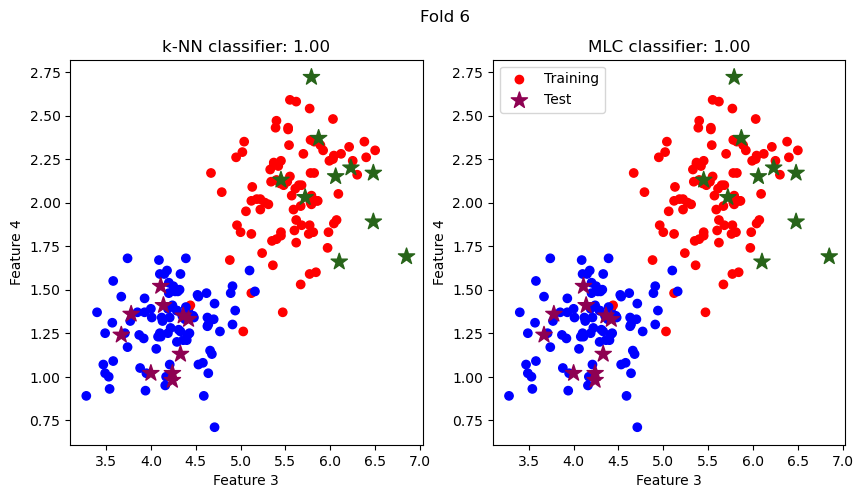


Fold 7
k-NN accuracy: 0.95
MLC accuracy: 1.00


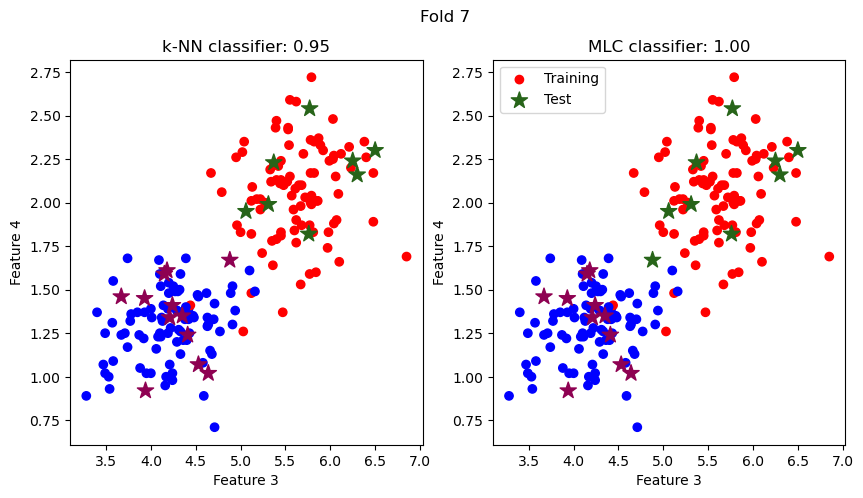


Fold 8
k-NN accuracy: 0.95
MLC accuracy: 0.95


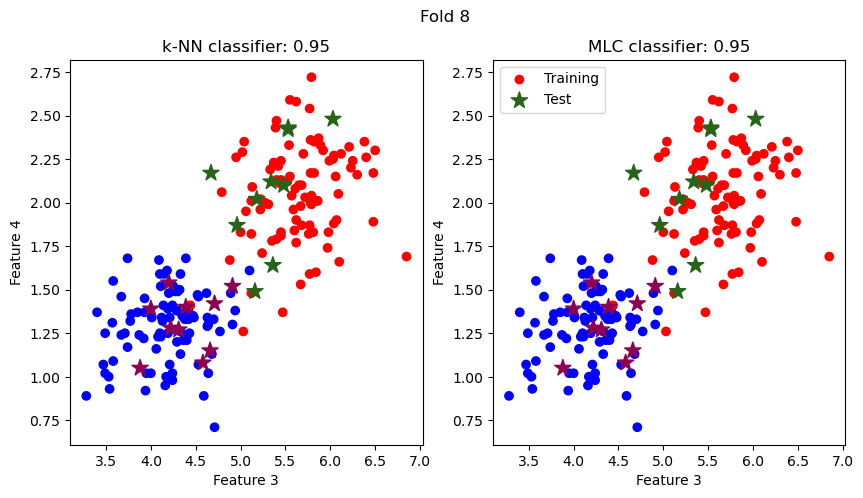


Fold 9
k-NN accuracy: 1.00
MLC accuracy: 1.00


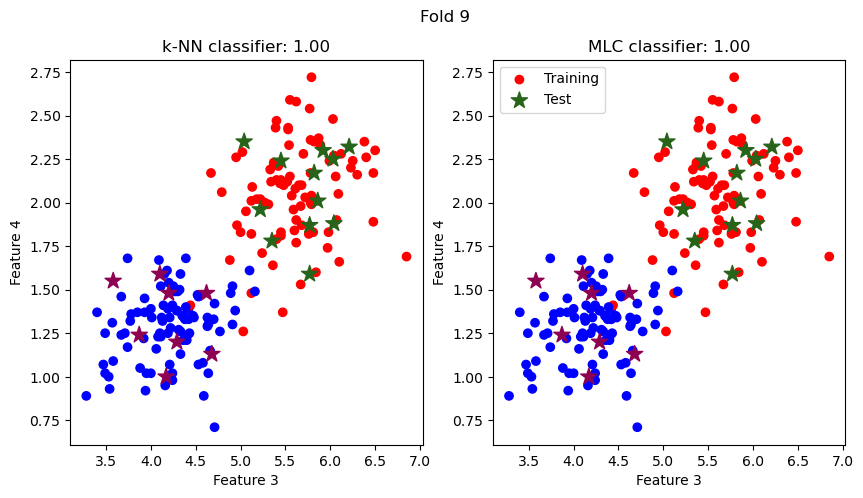


Fold 10
k-NN accuracy: 1.00
MLC accuracy: 1.00


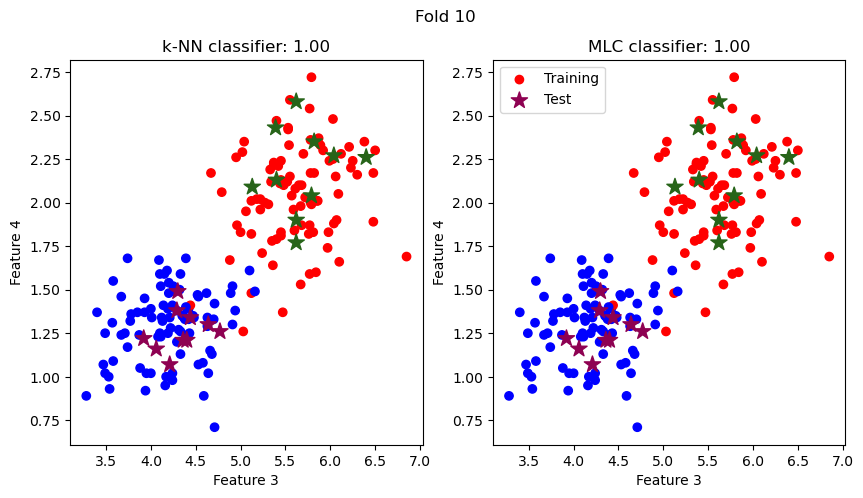


k-NN average accuracy: 0.97
MLC average accuracy: 0.97


In [6]:
# perform 10-fold cross validation on maximum likelihood classifier and KNN classifier
def cross_validation(data, k=10):
    # shuffle data before cross validation
    np.random.shuffle(data)
    fold_size = len(data) // k
    accuracy_scores_knn = []
    accuracy_scores_mlc = []

    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size
        data_test_fold = data[start:end]
        data_train_fold = np.concatenate([data[:start], data[end:]])
        y_test_fold = data_test_fold[:, -1]

        ############################################# k-NN classifier ####################################################
        print(f"\nFold {i+1}")
        knn = KNNClassifier(k=3)
        y_pred = [knn(x, data_train_fold) for x in data_test_fold]
        accuracy = np.sum(y_pred == y_test_fold) / len(y_test_fold)
        accuracy_scores_knn.append(accuracy)
        print(f"k-NN accuracy: {accuracy:.2f}")

        ###################################### Maximum likelihood classifier #############################################
        # calculate prior probabilities from data_train_fold
        y_train_fold = data_train_fold[:, -1]
        prior_probabilities = {i: np.sum(y_train_fold == i) / len(y_train_fold) for i in np.unique(y_train_fold)}
        # print(f"Prior probabilities: {prior_probabilities}")
        mean_vectors, covariance_matrices = estimate_parameters(data_train_fold)

        mlc_predicted_labels = []  # List to store the predicted labels for the current fold
        for sample in data_test_fold:
            test_sample = sample[:-1]
            true_label = int(sample[-1])
            predicted_label = minimum_risk_classifier(test_sample, mean_vectors, covariance_matrices, prior_probabilities)
            mlc_predicted_labels.append(predicted_label)  # Store the predicted label for the current sample

        mlc_accuracy = 1 - (np.sum(mlc_predicted_labels != y_test_fold) / len(y_test_fold))

        # Display results for the current fold
        print(f"MLC accuracy: {mlc_accuracy:.2f}")
        accuracy_scores_mlc.append(mlc_accuracy)
        ################################# end of Maximum likelihood classifier ###########################################

        # plot the results of each fold, comparing the two classifiers
        # using 2 subplots
        # x axis: feature 3
        # y axis: feature 4
        # training data: class 1: red, class 2: blue
        # test data: class 1: orange, class 2: green
        # title: fold i
        # subplot 1: k-NN classifier
        # subplot 2: MLC classifier
        plt.figure(figsize=(10, 5))
        plt.suptitle(f"Fold {i+1}")
        plt.subplot(1, 2, 1)
        plt.title(f"k-NN classifier: {accuracy:.2f}")
        plt.xlabel("Feature 3")
        plt.ylabel("Feature 4")
        plt.scatter(data_train_fold[:, 2], data_train_fold[:, 3], c=data_train_fold[:, -1], cmap="bwr")
        # test data as star with increasing size
        plt.scatter(data_test_fold[:, 2], data_test_fold[:, 3], s=150, marker="*", c=y_pred, cmap="PiYG")
        plt.subplot(1, 2, 2)
        plt.title(f"MLC classifier: {mlc_accuracy:.2f}")
        plt.xlabel("Feature 3")
        plt.ylabel("Feature 4")
        plt.scatter(data_train_fold[:, 2], data_train_fold[:, 3], c=data_train_fold[:, -1], cmap="bwr")
        plt.scatter(data_test_fold[:, 2], data_test_fold[:, 3], s=150, marker="*", c=mlc_predicted_labels, cmap="PiYG")
        plt.legend(("Training", "Test"))
        plt.show()
        plt.savefig(f"HW1-figures/fold_{i+1}.png")
        plt.close()

    avg_accuracy_knn = np.mean(accuracy_scores_knn)
    avg_accuracy_mlc = np.mean(accuracy_scores_mlc)
    print(f"\nk-NN average accuracy: {avg_accuracy_knn:.2f}")
    print(f"MLC average accuracy: {avg_accuracy_mlc:.2f}")
    # return avg_accuracy_knn, avg_accuracy_mlc
    
cross_validation(np.array(data_processed))